[타이타닉 인원 데이터를 활용하여 각 데크별 생존확률 분석하기] <hr>

In [6218]:
# 모듈 로딩딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import openpyxl as xl
font=fm.FontProperties(fname='C:\Windows\Fonts\HancomHoonminjeongeumH.ttf').get_name()
rc('font',family=font)

- deck의 빈값을 다른 변수를 분석하고 추론하여 채우기
- deck와 생존이 얼마나 연관되어 있는지 분석하기


In [6220]:
# [데이터 불러오기]
tDF=pd.read_csv(r'C:\Users\gy931\OneDrive\Desktop\KDP-7\03.VISUAL\DATA\titanic.csv')

In [6221]:
tDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [6222]:
tDF.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6223]:
# [age분석]
print(tDF['age'].isnull().sum())
print(tDF['age'].isna().sum())
tDF['age'].unique()
# [age 내 nan값 처리 필요]

177
177


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [6224]:
# [다른 열 확인 해보기]
for x in tDF.columns:
    print(x)
    print(tDF[x].unique())
    print(tDF[x].isna().sum())
    print(tDF[x].shape)
    print('*'*40)


survived
[0 1]
0
(891,)
****************************************
pclass
[3 1 2]
0
(891,)
****************************************
sex
['male' 'female']
0
(891,)
****************************************
age
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
177
(891,)
****************************************
sibsp
[1 0 3 4 2 5 8]
0
(891,)
****************************************
parch
[0 1 2 5 3 4 6]
0
(891,)
****************************************
fare
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625 

In [6225]:
# nan 값 존재:{'age':177,'embarked':2,'deck':668,'embark_town':2} 
tDF.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6226]:
# NaN값 처리 및 전부 숫자로 변경하여 상관관계 확인
# 1. age: 분석 후 nan의 평균값 채우기
# 2. 숫자로 변경 후 상관관계 확인
    # sex: male/female
    # sex: 0 , 1
    # embarked: S,C,Q,NaN
    # 		nan: 0 / C,Q,S: 1,2,3
    # class: delete
    # who: man, woman, child
    #     	0,1,2
    # deck: [nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']
    # 	0,1,2,3,4,5,6,7 -> 정렬 필요
    # embarked town: delete
    # alive: delete
    # alone: False, True
    # 	0, 1
# 3. deck값 결측치 분석 후 채우기우기

In [6227]:
# [1] age 분석 후 nan값 평균 값 처리하기기
tDF.replace(0,'0',inplace=True)
# age 결측치 나이 평균값으로 처리하기
print(tDF['age'].describe(include='all'))
# chlid면서 'age' 결측치 없음
tDF[tDF['who']=='child'].isna().sum()
# 평균값으로 처리해도 크게 문제 없음
tDF['age'].replace(np.nan,tDF['age'].mean(),inplace=True)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\374449576.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tDF['age'].replace(np.nan,tDF['age'].mean(),inplace=True)


In [6228]:
# [2-1] 숫자로 변경하고 상관관계 분석하기기
tDF.fillna('0',inplace=True)
# deck 변환하기
for x in ['sex','who','embarked','deck','alone']:
    if x in ['who','sex']:
        for a,b in zip(tDF[x].unique(),list(map(str,range(len(tDF[x].unique()))))):
            tDF[x].replace(a,b,inplace=True)
    for a,b in zip(tDF[x].sort_values(axis=0).unique(),list(map(str,range(len(tDF[x].unique()))))):
        tDF[x].replace(a,b,inplace=True)
tDF

C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\3572229597.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tDF[x].replace(a,b,inplace=True)
C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\3572229597.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.000000,1,0,7.25,3,Third,0,True,0,Southampton,no,0
1,1,1,1,38.000000,1,0,71.2833,1,First,1,False,3,Cherbourg,yes,0
2,1,3,1,26.000000,0,0,7.925,3,Third,1,False,0,Southampton,yes,1
3,1,1,1,35.000000,1,0,53.1,3,First,1,False,3,Southampton,yes,0
4,0,3,0,35.000000,0,0,8.05,3,Third,0,True,0,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0,3,Second,0,True,0,Southampton,no,1
887,1,1,1,19.000000,0,0,30.0,3,First,1,False,2,Southampton,yes,1
888,0,3,1,29.699118,1,2,23.45,3,Third,1,False,0,Southampton,no,0
889,1,1,0,26.000000,0,0,30.0,1,First,0,True,3,Cherbourg,yes,1


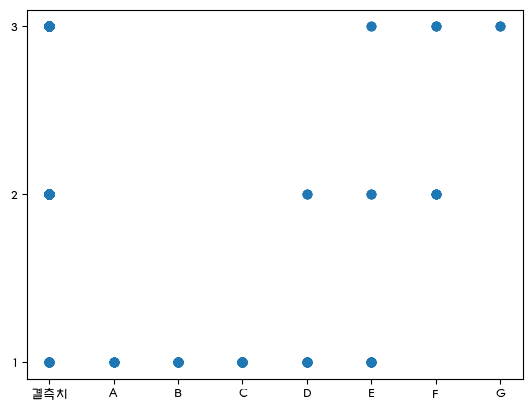

1등급의 결측치 값 ********************
41
1등급의 결측치가 아닌 값
175

2등급의 결측치 값 ********************
168
2등급의 결측치가 아닌 값
16

3등급의 결측치 값 ********************
479
3등급의 결측치가 아닌 값
12



In [6229]:
# [2-2] deck 기존 np.nan값 처리하기
# pclass와 deck위치 시각화 하여 분석
# deck: [nan 'A' 'B' 'C' 'D' 'E' 'F' 'G']
# 	      0  ,1,  2,  3,  4,  5,  6,  7
tDF.sort_values(by=['deck','pclass'],inplace=True)
plt.plot(tDF['deck'],tDF['pclass'].values,'o')
plt.yticks([1,2,3],tDF['pclass'].unique())
plt.xticks(range(len(tDF['deck'].unique())),['결측치','A','B','C','D','E','F','G'])
plt.show()
# nan값 각 등급 별로 몇개 있는지 확인
for x in range(1,4):
    print(f'{x}등급의 결측치 값 {"*"*20}')
    print(tDF.loc[:,['deck','pclass']][(tDF['pclass']==x) & (tDF['deck']=='0')].shape[0])
    print(f'{x}등급의 결측치가 아닌 값')
    print(tDF.loc[:,['deck','pclass']][(tDF['pclass']==x) & (tDF['deck']!='0')].shape[0])
    print()

# 1등급의 결측치 값 ********************
# 41
# 1등급의 결측치가 아닌 값
# 175

# 2등급의 결측치 값 ********************
# 168
# 2등급의 결측치가 아닌 값
# 16

# 3등급의 결측치 값 ********************
# 479
# 3등급의 결측치가 아닌 값
# 12
#-----------------------------------------------------------------------------------------------


In [6230]:
# 각 데크 별 clas와 객실 수 데이터 불러오기
t_deck_infoDF=pd.read_csv('../DATA/titanic_deck_info.csv')
# 각 등급별 deck 수 확인하기
for x in range(1,4):
    for y in list(map(str,range(0,8))):
        print(f'{x}등급별 {y}deck 인원 수 확인 {"*"*20}')
        print(tDF.loc[(tDF['pclass']==x) & (tDF['deck']==y)].shape[0])
    print('*'*20)

1등급별 0deck 인원 수 확인 ********************
41
1등급별 1deck 인원 수 확인 ********************
15
1등급별 2deck 인원 수 확인 ********************
47
1등급별 3deck 인원 수 확인 ********************
59
1등급별 4deck 인원 수 확인 ********************
29
1등급별 5deck 인원 수 확인 ********************
25
1등급별 6deck 인원 수 확인 ********************
0
1등급별 7deck 인원 수 확인 ********************
0
********************
2등급별 0deck 인원 수 확인 ********************
168
2등급별 1deck 인원 수 확인 ********************
0
2등급별 2deck 인원 수 확인 ********************
0
2등급별 3deck 인원 수 확인 ********************
0
2등급별 4deck 인원 수 확인 ********************
4
2등급별 5deck 인원 수 확인 ********************
4
2등급별 6deck 인원 수 확인 ********************
8
2등급별 7deck 인원 수 확인 ********************
0
********************
3등급별 0deck 인원 수 확인 ********************
479
3등급별 1deck 인원 수 확인 ********************
0
3등급별 2deck 인원 수 확인 ********************
0
3등급별 3deck 인원 수 확인 ********************
0
3등급별 4deck 인원 수 확인 ********************
0
3등급별 5deck 인원 수 확인 ********************
3
3등급별 6deck 인원 수 확인 *****

In [6231]:
# [등급 별 혼자 온 사람과 부양가족 인원으로 분리하여 객실 수 파악하기]
# 1. 혼자 아닌 사람중에 요금이 같은 사람
# 2. 요금이 같지만 child 제외
# 3. 부양가족, 인원 동일 한 사람
# 4. count가 2개일 경우 남자만 남김다
nDF=pd.DataFrame()
for x in tDF['fare'].unique():
    nDF=pd.concat([nDF,tDF[(tDF['fare']==x) & (tDF['alone']=='0')]])
nDF=nDF[tDF['who']!='2']
nDF.reset_index(drop=True,inplace=True)
mDF=pd.DataFrame()
for x in nDF['sibsp'].unique():
    mDF=pd.concat([mDF,nDF[nDF['sibsp']==x]])
nmDF=pd.DataFrame()
for x in mDF['sibsp'].unique():
    nmDF=pd.concat([nmDF,mDF[mDF['sibsp']==x]])
nmDF.reset_index(drop=True,inplace=True)
testDF=nmDF.set_index(['sibsp','parch','fare'])
testDF

C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\1041651259.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nDF=nDF[tDF['who']!='2']


survived  pclass sex        age embarked   class who  \
sibsp parch fare                                                           
1     0     27.7208        0       2   0  29.000000        1  Second   0   
            82.1708        0       1   0  28.000000        1   First   0   
            82.1708        1       1   1  29.699118        1   First   1   
            52.0000        0       1   0  42.000000        3   First   0   
            52.0000        1       1   1  35.000000        3   First   1   
...                      ...     ...  ..        ...      ...     ...  ..   
8     2     69.5500        0       3   0  29.699118        3   Third   0   
            69.5500        0       3   0  29.699118        3   Third   0   
            69.5500        0       3   1  29.699118        3   Third   1   
            69.5500        0       3   0  29.699118        3   Third   0   
            69.5500        0       3   1  29.699118        3   Third   1   

                     adult_male deck  embark_town alive alone  
sibsp parch fare                                               
1     0     27.7208        True    0    Cherbourg    no     0  
            82.1708        True    0    Cherbourg    no     0  
            82.1708       False    0    Cherbourg   yes     0  
            52.0000        True    0  Southampton    no     0  
            52.0000       False    0  Southampton   yes     0  
...                         ...  ...          ...   ...   ...  
8     2     69.5500        True    0  Southampton    no     0  
            69.5500        True    0  Southampton    no     0  
            69.5500       False    0  Southampton    no     0  
            69.5500        True    0  Southampton    no     0  
            69.5500       False    0  Southampton    no     0  

[277 rows x 12 columns]

In [6232]:
# testDF.index.unique()
ttDF=tDF.set_index(['sibsp','parch','fare'])
ttDF=ttDF[(ttDF['alone']=='0') & (ttDF['who']!='2')]
# 가족을 포함
ttDF.index.unique()
ttDF

survived  pclass sex        age embarked   class who  \
sibsp parch fare                                                           
1     0     82.1708        0       1   0  28.000000        1   First   0   
            52.0           0       1   0  42.000000        3   First   0   
0     1     61.3792        0       1   0  51.000000        1   First   0   
1     0     133.65         1       1   1  29.699118        3   First   1   
            82.1708        1       1   1  29.699118        1   First   1   
...                      ...     ...  ..        ...      ...     ...  ..   
0     1     12.475         1       3   1  27.000000        3   Third   1   
      2     26.0           0       2   0  36.500000        3  Second   0   
1     1     22.3583        1       3   1  29.699118        1   Third   1   
            10.4625        0       3   1  29.000000        3   Third   1   
0     2     16.7           1       3   1  24.000000        3   Third   1   

                     adult_male deck  embark_town alive alone  
sibsp parch fare                                               
1     0     82.1708        True    0    Cherbourg    no     0  
            52.0           True    0  Southampton    no     0  
0     1     61.3792        True    0    Cherbourg    no     0  
1     0     133.65        False    0  Southampton   yes     0  
            82.1708       False    0    Cherbourg   yes     0  
...                         ...  ...          ...   ...   ...  
0     1     12.475        False    5  Southampton   yes     0  
      2     26.0           True    6  Southampton    no     0  
1     1     22.3583       False    6    Cherbourg   yes     0  
            10.4625       False    7  Southampton    no     0  
0     2     16.7          False    7  Southampton   yes     0  

[277 rows x 12 columns]

In [6233]:
# 어린이의 전체 생존확률 확인
a=tDF[tDF['who']=='2']['survived'].values.astype(int).sum()
b=tDF[tDF['who']=='2']['survived'].values.shape[0]
round(a/b,2)*100


np.float64(59.0)

In [6234]:
# 각 데크 별 성인 남성/아이의 생존확률 확인
for x in list(map(str,range(0,8))):
    for y in ['0','1','2']:
        a=tDF[(tDF['who']==y) & (tDF['deck']==x)]['survived'].values.astype(int).sum()
        b=tDF[(tDF['who']==y) & (tDF['deck']==x)]['survived'].values.shape[0]
        if y=='0':
            print(f'살아남은 숫자: {a}')
            print(f'전체 숫자: {b}')
            print(f'{x}deck의 남성의 생존확률: {round(a/b,2)*100}')
            print('-'*40)
        if y=='1':
            print(f'살아남은 숫자: {a}')
            print(f'전체 숫자: {b}')
            print(f'{x}deck의 여성의 생존확률: {round(a/b,2)*100}')
            print('-'*40)
        if y=='2':
            print(f'살아남은 숫자: {a}')
            print(f'전체 숫자: {b}')
            print(f'{x}deck의 아이의 생존확률: {round(a/b,2)*100}')
            print('-'*40)
    print()
    print('*'*40)

살아남은 숫자: 50
전체 숫자: 438
0deck의 남성의 생존확률: 11.0
----------------------------------------
살아남은 숫자: 118
전체 숫자: 180
0deck의 여성의 생존확률: 66.0
----------------------------------------
살아남은 숫자: 38
전체 숫자: 70
0deck의 아이의 생존확률: 54.0
----------------------------------------

****************************************
살아남은 숫자: 5
전체 숫자: 13
1deck의 남성의 생존확률: 38.0
----------------------------------------
살아남은 숫자: 1
전체 숫자: 1
1deck의 여성의 생존확률: 100.0
----------------------------------------
살아남은 숫자: 1
전체 숫자: 1
1deck의 아이의 생존확률: 100.0
----------------------------------------

****************************************
살아남은 숫자: 7
전체 숫자: 19
2deck의 남성의 생존확률: 37.0
----------------------------------------
살아남은 숫자: 25
전체 숫자: 25
2deck의 여성의 생존확률: 100.0
----------------------------------------
살아남은 숫자: 3
전체 숫자: 3
2deck의 아이의 생존확률: 100.0
----------------------------------------

****************************************
살아남은 숫자: 10
전체 숫자: 31
3deck의 남성의 생존확률: 32.0
----------------------------------------
살아남은 숫자: 24
전체 숫자: 26
3de

C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\3642711365.py:19: RuntimeWarning: invalid value encountered in scalar divide
  print(f'{x}deck의 아이의 생존확률: {round(a/b,2)*100}')
C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\3642711365.py:9: RuntimeWarning: invalid value encountered in scalar divide
  print(f'{x}deck의 남성의 생존확률: {round(a/b,2)*100}')


In [6235]:
# 1등급에서 여자가 살아남았다면 1번 2번 4번 
# 1등급에서 아이가 살아남아있다면 3번 빼고 전부
# 1등급 남성인 살아남아있다면 4번 5번
# -----------------------------------------
# 2등급에서 여자가 살아남았다면 4번 6번
# 2등급에서 아이가 살아남아있다면 전부
# 2등급 남성인 살아남아있다면 4번 5번 6번 중 하나
# -----------------------------------------
# 3등급에서 여자가 살아남았다면 5번 6번
# 3등급에서 아이가 살아남아있다면 5번 6번
# 3등급 남성인 살아남아있다면 5번 7번 중 하나

In [6236]:
x=tDF.set_index(['sibsp','parch','embarked']).sort_index()
x=x.xs((1,1),level=(0,1))
x.sort_values(by='fare')

,survived,pclass,sex,age,fare,class,who,adult_male,deck,embark_town,alive,alone
embarked,,,,,,,,,,,,
1,0,3,0,15.000000,7.2292,Third,2,False,0,Cherbourg,no,0
1,0,3,0,17.000000,7.2292,Third,0,True,0,Cherbourg,no,0
3,0,3,0,18.000000,7.8542,Third,0,True,0,Southampton,no,0
3,0,3,1,29.000000,10.4625,Third,1,False,7,Southampton,no,0
3,1,3,1,1.000000,11.1333,Third,2,False,0,Southampton,yes,0
3,1,3,0,4.000000,11.1333,Third,2,False,0,Southampton,yes,0
3,0,3,1,28.000000,14.4,Third,1,False,0,Southampton,no,0
3,0,3,0,34.000000,14.4,Third,0,True,0,Southampton,no,0
3,1,2,0,0.670000,14.5,Second,2,False,0,Southampton,yes,0


C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\1574411158.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a=tDF[tDF['pclass']==1]['fare'].replace('0',np.nan)
C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\1574411158.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  b=tDF[tDF['pclass']==2]['fare'].replace('0',np.nan)
C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\1574411158.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explici

5.0
512.3292


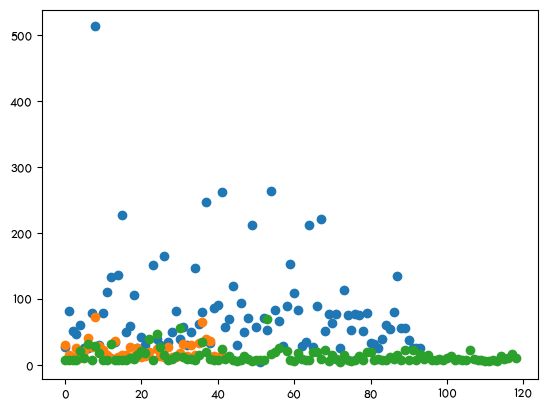

[  5.      25.5875  25.925   25.9292  26.      26.2833  26.2875  26.3875
  26.55    27.7208  27.75    28.5     28.7125  29.7     30.      30.5
  30.6958  31.      32.3208  33.5     34.0208  34.6542  35.      35.5
  38.5     39.4     39.6     40.125   42.4     47.1     49.5     49.5042
  50.      50.4958  51.4792  51.8625  52.      52.5542  53.1     55.
  55.4417  55.9     56.9292  57.      57.9792  59.4     61.175   61.3792
  61.9792  63.3583  66.6     69.3     71.      71.2833  75.25    76.2917
  76.7292  77.2875  77.9583  78.2667  78.85    79.2     79.65    80.
  81.8583  82.1708  83.1583  83.475   86.5     89.1042  90.      91.0792
  93.5    106.425  108.9    110.8833 113.275  120.     133.65   134.5
 135.6333 146.5208 151.55   153.4625 164.8667 211.3375 211.5    221.7792
 227.525  247.5208 262.375  263.     512.3292      nan]
[10.5    11.5    12.     12.275  12.35   12.525  12.65   12.875  13.
 13.5    13.7917 13.8583 13.8625 14.     14.5    15.     15.0458 15.05
 15.75   16.     1

In [6237]:
# tDF[(tDF['fare'].astype('int'))>=870]
a=tDF[tDF['pclass']==1]['fare'].replace('0',np.nan)
b=tDF[tDF['pclass']==2]['fare'].replace('0',np.nan)
c=tDF[tDF['pclass']==3]['fare'].replace('0',np.nan)
print(a.min())
print(a.max())
tDF[tDF['who']=='2']
plt.plot(a.unique(),'o')
plt.plot(b.unique(),'o')
plt.plot(c.unique(),'o')
plt.show()
a=a.unique()
a.sort(axis=0)
print(a)
b=b.unique()
b.sort(axis=0)
print(b)
c=c.unique()
c.sort(axis=0)
print(c)

In [6238]:
# class:2의 표준 가격 알아보기
# 원래 데이터 값에서 nan값과 outlier 처리
b=tDF[(tDF['pclass']==2) & (tDF['alone']=='1')].replace('0',np.nan)
b['fare'].unique()
# 73: outlier
tDF['fare'][tDF['fare']==73.5]=b['fare'].dropna().unique().mean()
tDF['fare'][(tDF['pclass']==2) & (tDF['fare']=='0')]=b['fare'].dropna().unique().mean()
a=tDF[(tDF['pclass']==2) & (tDF['alone']=='1')]['fare'].unique()
a.sort()
a

C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\3874671565.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  b=tDF[(tDF['pclass']==2) & (tDF['alone']=='1')].replace('0',np.nan)
C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\3874671565.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Us

array([10.5, 11.5, 12.0, 12.275, 12.35, 12.525, 12.65, 12.875, 13.0, 13.5,
       13.7917, 13.8625, 14.0, 15.0, 15.0458, 15.05, 15.75, 16.0,
       np.float64(17.962500000000002), 21.0, 26.0, 33.0], dtype=object)

In [6239]:
# class:1의 표준 가격 알아보기
# 원래 데이터 값에서 nan값과 outlier 처리
b=tDF[(tDF['pclass']==1) & (tDF['alone']=='1')].replace('0',np.nan)
c=b['fare'].dropna().unique()
c.sort()
# 5: 평균 값으로 처리
tDF['fare'][tDF['fare']==5]=b['fare'].dropna().unique().mean()
tDF['fare'][(tDF['pclass']==1) & (tDF['fare']=='0')]=b['fare'].dropna().unique().mean()
tDF[(tDF['pclass']==1) & (tDF['alone']=='1')]['fare'].unique()

C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\3685852332.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  b=tDF[(tDF['pclass']==1) & (tDF['alone']=='1')].replace('0',np.nan)
C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\3685852332.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Us

array([27.7208, 47.1, 25.925, 26.55, 79.2, 512.3292, 31.0, 78.85,
       110.8833, 35.5, 135.6333, 227.525, 49.5042, 106.425, 26.0, 42.4,
       30.5, np.float64(74.34893818181817), 151.55, 39.6, 30.6958,
       34.6542, 50.0, 52.0, 40.125, 30.0, 50.4958, 80.0, 33.5, 146.5208,
       86.5, 69.3, 29.7, 93.5, 211.3375, 28.7125, 83.1583, 28.5, 35.0,
       27.75, 221.7792, 153.4625, 76.2917, 34.0208, 32.3208, 77.9583,
       76.7292, 25.9292, 51.8625, 56.9292, 134.5, 38.5, 26.2875, 26.3875,
       25.5875], dtype=object)

In [6240]:
# class:3의 표준 가격 알아보기
# 원래 데이터 값에서 nan값과 outlier 처리
b=tDF[(tDF['pclass']==3) & (tDF['alone']=='1')].replace('0',np.nan)
c=b['fare'].dropna().unique()
c.sort()
b[(tDF['fare']==56.4958)]
# # 56.4958: 평균 값으로 처리
tDF['fare'][tDF['fare']==56.4958]=b['fare'].dropna().unique().mean()
tDF['fare'][(tDF['pclass']==3) & (tDF['fare']=='0')]=b['fare'].dropna().unique().mean()
tDF[(tDF['pclass']==3) & (tDF['alone']=='1')]['fare'].unique()

C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\733778757.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  b=tDF[(tDF['pclass']==3) & (tDF['alone']=='1')].replace('0',np.nan)
C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\733778757.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b[(tDF['fare']==56.4958)]
C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\733778757.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on w

array([7.925, 8.05, 8.4583, 7.8542, 7.225, 8.0292, 7.8792, 7.8958, 7.75,
       7.2292, 7.8, 8.1583, np.float64(9.711888), 12.475, 9.0, 9.5,
       7.7875, 7.25, 8.6542, 7.65, 7.775, 14.4583, 7.1417, 6.975, 7.05,
       9.2167, 6.75, 7.7958, 7.3125, 7.7333, 8.6625, 6.4958, 18.7875,
       9.35, 7.55, 7.125, 8.85, 6.2375, 9.225, 4.0125, 7.7292, 6.8583,
       7.875, 8.1125, 7.725, 9.8375, 7.5208, 9.5875, 15.1, 7.6292, 22.525,
       7.4958, 24.15, 14.5, 7.8292, 8.7125, 16.1, 7.0542, 8.4333, 9.8417,
       8.1375, 10.1708, 7.7417, 9.4833, 15.5, 7.7375, 8.3625, 8.6833,
       7.8875, 6.45, 6.95, 8.3, 6.4375, 9.8458, 10.5167], dtype=object)

In [6241]:

# 요금 값 확인하기
a=tDF[(tDF['pclass']==3) & (tDF['alone']=='0')]['fare'].unique()
a.sort()
print(a)
tDF[(tDF['fare']==46.9) & (tDF['pclass']==3)].sort_values('fare',ascending=False)
# 3등급은 보통 6에서 11사이에 가격 형성 
# 높은 가격대는 sibsp와 parch 합친 가격에 평균값 곱하면 비슷하게 나옴옴
a=tDF[(tDF['pclass']==2) & (tDF['alone']=='0')]['fare'].unique()
a.sort()
print(a)
tDF[(tDF['fare']==41.5792) & (tDF['pclass']==2)].sort_values('fare',ascending=False)
# 2등급은 10에서 16사이 가격 형성
a=tDF[(tDF['pclass']==1) & (tDF['alone']=='0')]['fare'].unique()
a.sort()
print(a)


[6.4958 7.0458 7.0542 7.2292 7.25 7.75 7.775 7.8542 7.925 8.4042 8.5167
 8.6625 9.35 9.475 9.825 10.4625 11.1333 11.2417 12.2875 12.475 13.4167
 14.1083 14.4 14.4542 14.4583 14.5 15.2458 15.5 15.55 15.7417 15.85 15.9
 16.1 16.7 17.4 17.8 18.0 19.2583 19.9667 20.2125 20.25 20.525 20.575
 21.075 21.6792 22.025 22.3583 23.25 23.45 24.15 25.4667 27.9 29.125
 31.275 31.3875 34.375 39.6875 46.9 69.55]
[11.5 13.0 13.8583 14.5 np.float64(17.962500000000002) 18.75 19.5 21.0
 23.0 24.0 26.0 26.25 27.0 27.7208 27.75 29.0 30.0 30.0708 32.5 33.0 36.75
 37.0042 39.0 41.5792 65.0]
[26.2833 29.7 39.4 39.6 49.5 51.4792 51.8625 52.0 52.5542 53.1 55.0
 55.4417 55.9 56.9292 57.0 57.9792 59.4 61.175 61.3792 61.9792 63.3583
 66.6 71.0 71.2833 75.25 76.7292 77.2875 77.9583 78.2667 78.85 79.2 79.65
 81.8583 82.1708 83.1583 83.475 89.1042 90.0 91.0792 93.5 106.425 108.9
 110.8833 113.275 120.0 133.65 134.5 146.5208 151.55 153.4625 164.8667
 211.3375 211.5 227.525 247.5208 262.375 263.0 512.3292]


In [6242]:
# ********************
# 2등급별 0deck 인원 수 확인 ********************
# 168
# 2등급별 1deck 인원 수 확인 ********************
# 0
# 2등급별 2deck 인원 수 확인 ********************
# 0
# 2등급별 3deck 인원 수 확인 ********************
# 0
# 2등급별 4deck 인원 수 확인 ********************
# 4
# 2등급별 5deck 인원 수 확인 ********************
# 4
# 2등급별 6deck 인원 수 확인 ********************
# 8
# 2등급별 7deck 인원 수 확인 ********************
# 0
# ********************
# 3등급별 0deck 인원 수 확인 ********************
# 479
# 3등급별 1deck 인원 수 확인 ********************
# 0
# 3등급별 2deck 인원 수 확인 ********************
# 0
# 3등급별 3deck 인원 수 확인 ********************
# 0
# 3등급별 4deck 인원 수 확인 ********************
# 0
# 3등급별 5deck 인원 수 확인 ********************
# 3
# 3등급별 6deck 인원 수 확인 ********************
# 5
# 3등급별 7deck 인원 수 확인 ********************
# 4


class별 요금 및 인원수로 deck 변경하기 <hr>

In [6243]:
# class별 요금 및 인원수로 deck 변경하기
# [1등급]
tDF=tDF.copy()
a=(tDF['pclass']==1) & (tDF['deck']=='0')& (tDF['fare']>=50)
tDF.loc[a,'deck']='1'
b=(tDF['pclass']==1) & (tDF['deck']=='0')& (tDF['fare']<50)
tDF.loc[b,'deck']='4'
tDF[b]
# [2등급] 4,5,6
# 요금이 많이 높은 상위 13는 4데크 이동
b=(tDF['pclass']==2) & (tDF['deck']=='0')
a=tDF.loc[b,'fare'].unique()
a.sort() 
print(len(a))
for x in a[-13:] :
    y=(tDF['pclass']==2) & (tDF['deck']=='0')& (tDF['fare']==x)
    tDF.loc[y,'deck']='4'
b=(tDF['pclass']==2) & (tDF['deck']=='4')
tDF[b]
# 다음 요금이 많이 높은 상위 13는 5데크 이동
for x in a[-26:] :
    y=(tDF['pclass']==2) & (tDF['deck']=='0')& (tDF['fare']==x)
    tDF.loc[y,'deck']='5'
b=(tDF['pclass']==2) & (tDF['deck']=='5')
tDF[b]
for x in a[:14] :
    y=(tDF['pclass']==2) & (tDF['deck']=='0')& (tDF['fare']==x)
    tDF.loc[y,'deck']='6'
b=(tDF['pclass']==2) & (tDF['deck']=='5')
tDF[b]
# [3등급] 5,6,7
tDF.loc[tDF['sibsp']=='0','sibsp']=0
tDF.loc[tDF['parch']=='0','parch']=0
# 잘못변경된 값 바로 잡기기
a=(tDF['pclass']==3) & (tDF['deck']=='0')
print(tDF.loc[a,'sibsp'].unique())
# 대형 가족 6번 데크 이동
tDF.loc[tDF['sibsp']==8,'deck']='6'
# a=(tDF['pclass']==3) & (tDF['deck']=='0') & (tDF['sibsp']+tDF['parch']>=5)
# tDF.loc[a]
testDF=tDF.copy()
x=testDF.loc[a,'fare']/(testDF.loc[a,'sibsp']+testDF.loc[a,'parch']+1)
testDF.loc[a,'fare']=x
a=testDF.loc[a,'fare'].unique()
a.sort()
print(a)
print(len(a))
testDF[testDF['fare']==3.625]
a[a>9]
# 1인 평균 요금 7.5이상 5데크 이동
for x in a[a>7.5]:
    y=(testDF['pclass']==3) & (testDF['deck']=='0')& (testDF['fare']==x)
    testDF.loc[y,'deck']='5'
b=(testDF['pclass']==3) & (testDF['deck']=='5')
testDF[b]
# 1인 평균 요금 6.5이상 6데크 이동
for x in a[a>4]:
    y=(testDF['pclass']==3) & (testDF['deck']=='0')& (testDF['fare']==x)
    testDF.loc[y,'deck']='6'
b=(testDF['pclass']==3) & (testDF['deck']=='6')
testDF[b]
for x in a[a>1]:
    y=(testDF['pclass']==3) & (testDF['deck']=='0')& (testDF['fare']==x)
    testDF.loc[y,'deck']='7'
b=(testDF['pclass']==3)
tDF.loc[(tDF['pclass']==3),'deck']=testDF.loc[b,'deck']
tDF.loc[(tDF['pclass']==3),'fare']

39
[1 0 3 4 2 5 8]
[1.1321428571428571 2.409733333333333 2.5833333333333335
 2.6180666666666665 2.6416666666666666 2.8874999999999997 3.2479 3.5229
 3.5271 3.625 3.7111 3.875 3.8875 3.9271 3.9625 4.0125 4.2021 4.215
 4.25835 4.4678571428571425 4.483928571428572 4.6499999999999995 4.675
 4.702766666666666 4.7375 4.8 4.814575 4.833333333333333 4.854166666666667
 4.9125 5.081933333333333 5.0933399999999995 5.14375 5.166666666666667
 5.247233333333333 5.3 5.62085 5.8625 6.0 6.14375 6.2375 6.322727272727272
 6.4375 6.45 6.4958 6.614583333333333 6.70835 6.7375 6.75
 6.841666666666666 6.8583 6.875 6.95 6.975 7.05 7.0542 7.125 7.1417 7.225
 7.226400000000001 7.2271 7.22915 7.2292 7.25 7.3125 7.341666666666666
 7.452766666666666 7.4958 7.5208 7.55 7.6292 7.65 7.725 7.7292 7.7333
 7.7375 7.7417 7.75 7.775 7.7875 7.7958 7.8 7.8292 7.8542 7.875 7.8792
 7.8875 7.8958 7.925 8.0292 8.049999999999999 8.05 8.1125 8.1375 8.1583
 8.3 8.3625 8.4333 8.4583 8.6542 8.6625 8.6833 8.7 8.7125 8.85 8.9 9.0
 9.21

0         7.25
2        7.925
4         8.05
5       8.4583
7       21.075
        ...   
776       7.75
10        16.7
205    10.4625
251    10.4625
394       16.7
Name: fare, Length: 491, dtype: object

class별 인원 별 생존확률에 deck 변경하기: pass <hr>

In [6244]:
# # ********************
# 1등급에서 여자가 살아남았다면 1번 2번 4번 
# 1등급에서 아이가 살아남아있다면 3번 빼고 전부
# 1등급 남성인 살아남아있다면 4번 5번
# -----------------------------------------
# 2등급에서 여자가 살아남았다면 4번 6번
# 2등급에서 아이가 살아남아있다면 전부
# 2등급 남성인 살아남아있다면 4번 5번 6번 중 하나
# -----------------------------------------
# 3등급에서 여자가 살아남았다면 5번 6번
# 3등급에서 아이가 살아남아있다면 5번 6번
# 3등급 남성인 살아남아있다면 5번 7번 중 하나

# 1번 데크
# 남성 38% 나머지 100%
# 2번 데크
# 남성 37% 나머지 100%
# 3번 데크
# 남성 32% 여자 92% 아이 50%
# 4번데크
# 남성 47% 나머지 100%
# 5번데크
# 남성 56% 여성 93% 아이 100%
# 6번데크 
# 남성 0% 나머지 100%
# 7번데크 
# 남성 없음 채울 필요 있음, 여성 50%, 아이 50%

[data 분석하기] <hr>

In [6245]:
for x in list(map(str,range(1,8))):
    for y in ['0','1','2']:
        a=tDF[(tDF['who']==y) & (tDF['deck']==x)]['survived'].values.astype(int).sum()
        b=tDF[(tDF['who']==y) & (tDF['deck']==x)]['survived'].values.shape[0]
        if y=='0':
            print(f'살아남은 숫자: {a}')
            print(f'전체 숫자: {b}')
            print(f'{x}deck의 남성의 생존확률: {round(a/b,1)*100}')
            print('-'*40)
        if y=='1':
            print(f'살아남은 숫자: {a}')
            print(f'전체 숫자: {b}')
            print(f'{x}deck의 여성의 생존확률: {round(a/b,2)*100}')
            print('-'*40)
        if y=='2':
            print(f'살아남은 숫자: {a}')
            print(f'전체 숫자: {b}')
            print(f'{x}deck의 아이의 생존확률: {round(a/b,2)*100}')
            print('-'*40)
    print()
    print('*'*40)

살아남은 숫자: 6
전체 숫자: 21
1deck의 남성의 생존확률: 30.0
----------------------------------------
살아남은 숫자: 13
전체 숫자: 13
1deck의 여성의 생존확률: 100.0
----------------------------------------
살아남은 숫자: 1
전체 숫자: 1
1deck의 아이의 생존확률: 100.0
----------------------------------------

****************************************
살아남은 숫자: 7
전체 숫자: 19
2deck의 남성의 생존확률: 40.0
----------------------------------------
살아남은 숫자: 25
전체 숫자: 25
2deck의 여성의 생존확률: 100.0
----------------------------------------
살아남은 숫자: 3
전체 숫자: 3
2deck의 아이의 생존확률: 100.0
----------------------------------------

****************************************
살아남은 숫자: 10
전체 숫자: 31
3deck의 남성의 생존확률: 30.0
----------------------------------------
살아남은 숫자: 24
전체 숫자: 26
3deck의 여성의 생존확률: 92.0
----------------------------------------
살아남은 숫자: 1
전체 숫자: 2
3deck의 아이의 생존확률: 50.0
----------------------------------------

****************************************
살아남은 숫자: 12
전체 숫자: 44
4deck의 남성의 생존확률: 30.0
----------------------------------------
살아남은 숫자: 29
전체 숫자: 29
4deck의

In [ ]:
# 안에도 설계도를 보면서 각 데크별 확률이 그러함을 분석석

In [6246]:
# [2-3] 분석에 필요없는 열 drop하기
tDF.drop(columns=['class','alive','embark_town'],inplace=True)

In [6247]:
# [2-4] 상관관계 분석하기
print(tDF.columns)
tDF=tDF.astype('int')
t_corrDF=tDF.corr()
for x in tDF.columns:
    t_corrDF.loc[x,x]=np.nan
    a=list(t_corrDF[t_corrDF[x]==t_corrDF[x].max()].index)[0]
    b=list(t_corrDF[t_corrDF[x]==t_corrDF[x].min()].index)[0]
    print(f'{x}의 가장 높은 상관관계 요소: {a} = {t_corrDF[x].max():.2f}')
    print(f'{x}의 상관관계가 가장 반대인 요소: {b} = {t_corrDF[x].min():.2f}')
    print('*'*40)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'alone'],
      dtype='object')
survived의 가장 높은 상관관계 요소: sex = 0.54
survived의 상관관계가 가장 반대인 요소: adult_male = -0.56
****************************************
pclass의 가장 높은 상관관계 요소: deck = 0.72
pclass의 상관관계가 가장 반대인 요소: fare = -0.57
****************************************
sex의 가장 높은 상관관계 요소: who = 0.72
sex의 상관관계가 가장 반대인 요소: adult_male = -0.91
****************************************
age의 가장 높은 상관관계 요소: adult_male = 0.25
age의 상관관계가 가장 반대인 요소: who = -0.44
****************************************
sibsp의 가장 높은 상관관계 요소: parch = 0.41
sibsp의 상관관계가 가장 반대인 요소: alone = -0.58
****************************************
parch의 가장 높은 상관관계 요소: sibsp = 0.41
parch의 상관관계가 가장 반대인 요소: alone = -0.58
****************************************
fare의 가장 높은 상관관계 요소: survived = 0.25
fare의 상관관계가 가장 반대인 요소: deck = -0.58
****************************************
embarked의 가장 높은 상관관계 요소: deck = 0.23
embarked의

C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\2299123150.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


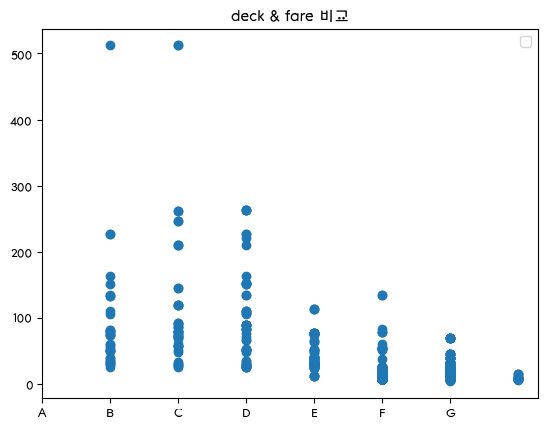

In [6248]:

# [시각화를 통한 분석 필요]
xlabel='deck'
ylabel='fare'
tDF.sort_values(by=[xlabel,ylabel],inplace=True)
plt.plot(tDF[xlabel],tDF[ylabel],'o')
plt.legend()
plt.xticks(range(len(tDF[xlabel].unique())),['A','B','C','D','E','F','G'])
plt.title('deck & fare 비교')
plt.show()



C:\Users\gy931\AppData\Local\Temp\ipykernel_15016\130830781.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


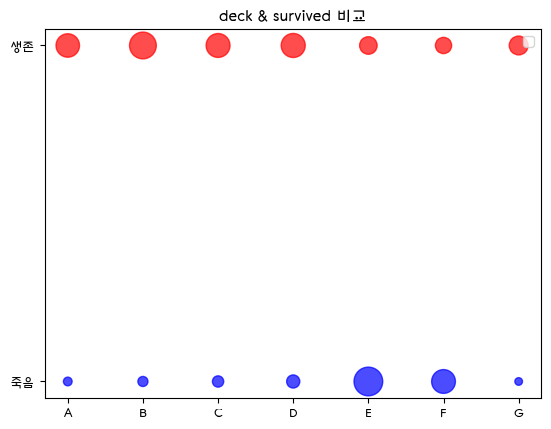

In [ ]:
xlabel='deck'
ylabel='survived'
tDF.sort_values(by=[xlabel,ylabel],inplace=True)
count_df = tDF.groupby([xlabel, ylabel]).size().unstack(fill_value=0)

# 전체 인원 계산 (deck별 비율을 구하기 위해)-gpt의 함을 받음
count_df['total'] = count_df[0] + count_df[1]
count_df['percentage'] = (count_df['total'] / count_df['total'].sum()) * 100
plt.scatter(count_df.index, [0] * len(count_df), 
            s=count_df['percentage'] * 10, alpha=0.7, color='blue')

plt.scatter(count_df.index, [1] * len(count_df), 
            s=(count_df[1] / count_df['total']) * 500, alpha=0.7, color='red')

count_df['percentage'] = (count_df['total'] / count_df['total'].sum()) * 100
plt.legend()
plt.xticks(range(1,len(tDF[xlabel].unique())+1),['A','B','C','D','E','F','G'])
plt.yticks(range(len(tDF[ylabel].unique())),['죽음','생존'])
plt.title('deck & survived 비교')
plt.show()